In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

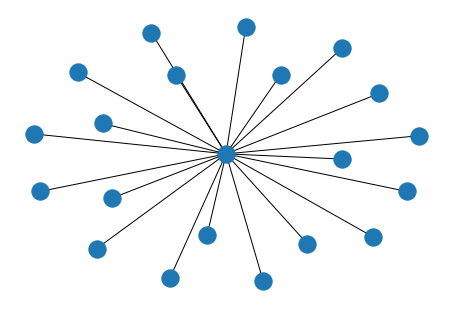

In [4]:
n = 20 # Number of nodes
min_delay = 1
max_delay = 15

netflix_bias = 0.3
output_nodes = 3
# last three nodes are hulu
# penultimate three nodes are netflix

num_pings = 100
num_days = 18

G = nx.star_graph(n)
nx.draw(G)

In [5]:
# random.seed(42)

# for e in G.edges():
#     G[e[0]][e[1]]['weight'] = random.randint(min_delay, max_delay)
    
# len_path = dict(nx.all_pairs_dijkstra_path(G))

# packet_count = pd.DataFrame(columns = list(G.nodes()))

# for i in range(num_days):
#     packet_count = packet_count.append(pd.Series(np.zeros(n), name = 'Day'+str(i)))
#     for j in range(num_pings):
#         source = random.randint(0, n - 2*output_nodes-1)
#         bias = (random.uniform(0,1) < netflix_bias)
#         dest = random.randint(n-(bias + 1)*output_nodes, n-(bias)*output_nodes-1)
#         path = len_path[source][dest]
#         for node in path:
#             packet_count.loc['Day'+str(i)][node] += 1                          
# packet_count                             

In [83]:
def get_packet_counts(G, n = 20, min_delay = 1, max_delay = 15, netflix_bias = 0.7, 
                      output_nodes = 1, num_pings = 100, num_days = 36):
    pos = nx.spring_layout(G)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    random.seed(42)

    for e in G.edges():
        G[e[0]][e[1]]['weight'] = random.randint(min_delay, max_delay)
#         G[e[0]][e[1]]['weight'] = 1

    len_path = dict(nx.all_pairs_dijkstra_path(G))

    packet_count = pd.DataFrame(columns = list(G.nodes()))

    for i in range(num_days):
        packet_count = packet_count.append(pd.Series(np.zeros(n), name = 'Day'+str(i)))
        for j in range(num_pings):
            if random.randint(0, 1)==1:
                source = i%18
            else:
                source = random.randint(0, n - 2*output_nodes-1)
#             source = random.randint(0,5)
            bias = (random.uniform(0,1) < netflix_bias)
            dest = random.randint(n-(bias + 1)*output_nodes, n-(bias)*output_nodes-1)
            path = len_path[source][dest]
#             print("source:", source, "dest: ", dest, "path: ", path)
            for node in path:
                packet_count.loc['Day'+str(i)][node] += 1                          
    return packet_count        
modifier = '_random_delay_200days_equalbias'

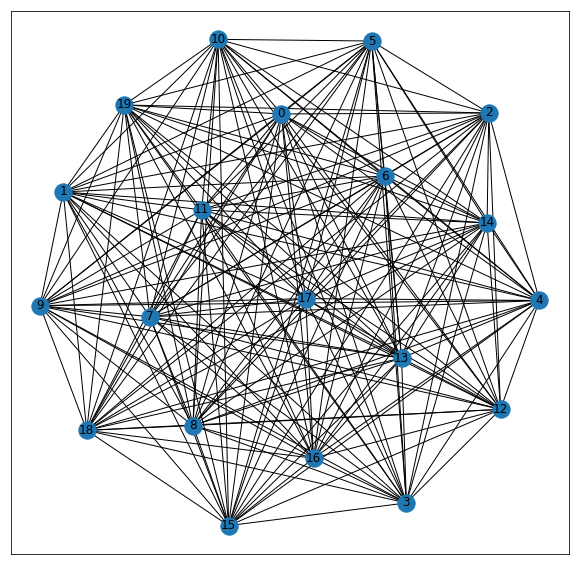

In [68]:
g1 = nx.complete_graph(20)
df = get_packet_counts(g1, netflix_bias=0.7, num_days=200)
df.to_csv('complete_graph_counts'+modifier+'.csv')

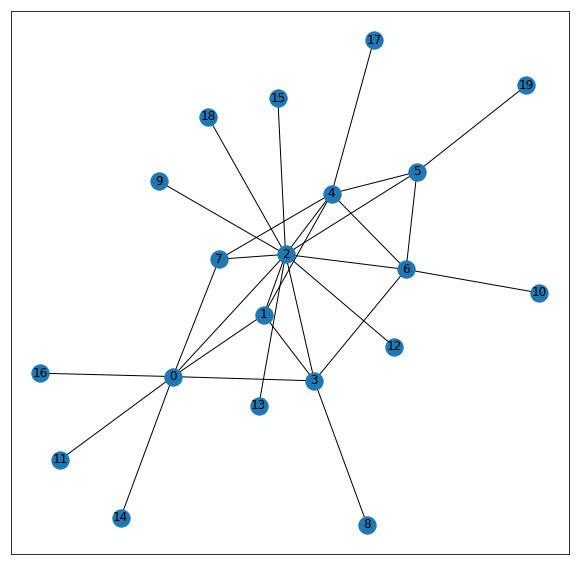

In [87]:
plt.rcParams['figure.figsize']=[10,10]
g2 = nx.random_internet_as_graph(20, 1)
df = get_packet_counts(g2, netflix_bias=0.5, num_days=200)
df.to_csv('AS_graph_counts'+modifier+'.csv')
plt.savefig("AS_graph"+modifier+".png", format="PNG")

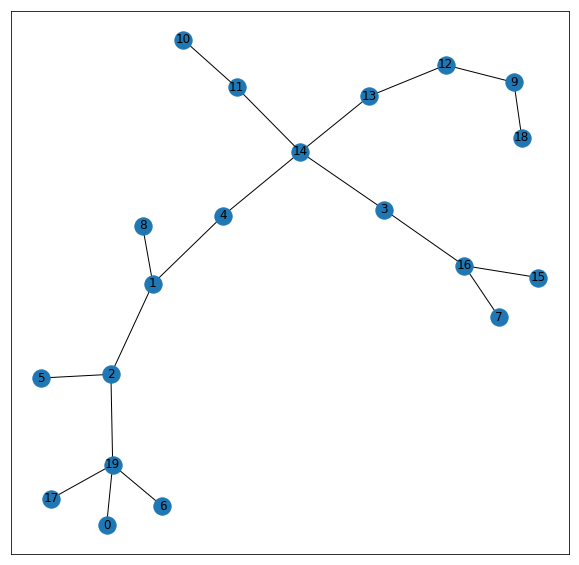

In [84]:
g3 = nx.random_tree(20, 37)
df = get_packet_counts(g3, netflix_bias=0.5, num_days=2)
df.to_csv('tree_graph_counts'+modifier+'.csv')
plt.savefig("tree_graph"+modifier+".png", format="PNG")

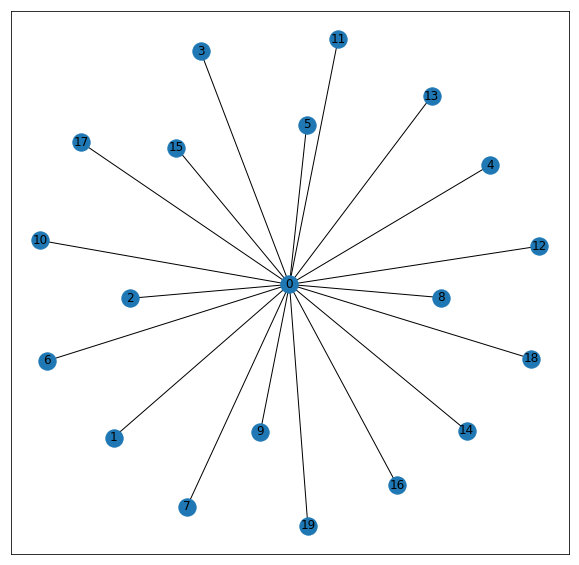

In [66]:
g4 = nx.star_graph(19)
df = get_packet_counts(g4, netflix_bias=0.7, num_days=200)
df.to_csv('star_graph_counts'+modifier+'.csv')

In [ ]:
pos = nx.spring_layout(g1)
nx.draw_networkx_labels(g1, pos)
nx.draw_networkx_nodes(g1,pos)
nx.draw_networkx_edges(g1,pos)
plt.savefig("complete_graph.png", format="PNG")

In [ ]:
pos = nx.spring_layout(g2)
nx.draw_networkx_labels(g2, pos)
nx.draw_networkx_nodes(g2,pos)
nx.draw_networkx_edges(g2,pos)
plt.savefig("AS_graph.png", format="PNG")

In [ ]:
pos = nx.spring_layout(g3)
nx.draw_networkx_labels(g3, pos)
nx.draw_networkx_nodes(g3,pos)
nx.draw_networkx_edges(g3,pos)
plt.savefig("randomtree_graph.png", format="PNG")

In [ ]:
pos = nx.spring_layout(g4)
nx.draw_networkx_labels(g4, pos)
nx.draw_networkx_nodes(g4,pos)
nx.draw_networkx_edges(g4,pos)
plt.savefig("star_graph.png", format="PNG")

## GETTING EDGES

In [110]:
g2_edge_dict = {}
for edge in list(g2.edges()):
    if str(edge[0]) in g2_edge_dict.keys() and str(edge[1]) not in g2_edge_dict[str(edge[0])]:
        g2_edge_dict[str(edge[0])].append(str(edge[1]))
    if str(edge[1]) in g2_edge_dict.keys() and str(edge[0]) not in g2_edge_dict[str(edge[1])]:
        g2_edge_dict[str(edge[1])].append(str(edge[0]))
    if str(edge[0]) not in g2_edge_dict.keys():
        g2_edge_dict[str(edge[0])]=[str(edge[1])]
    if str(edge[1]) not in g2_edge_dict.keys():
        g2_edge_dict[str(edge[1])]=[str(edge[0])]
# g2_edge_dict

In [111]:
g3_edge_dict = {}
for edge in list(g3.edges()):
    if str(edge[0]) in g3_edge_dict.keys() and str(edge[1]) not in g3_edge_dict[str(edge[0])]:
        g3_edge_dict[str(edge[0])].append(str(edge[1]))
    if str(edge[1]) in g3_edge_dict.keys() and str(edge[0]) not in g3_edge_dict[str(edge[1])]:
        g3_edge_dict[str(edge[1])].append(str(edge[0]))
    if str(edge[0]) not in g3_edge_dict.keys():
        g3_edge_dict[str(edge[0])]=[str(edge[1])]
    if str(edge[1]) not in g3_edge_dict.keys():
        g3_edge_dict[str(edge[1])]=[str(edge[0])]
# g3_edge_dict

In [211]:
data_file = open('143 data/arcs(tree_moreseparate1819_cor_gs_lownetflix).txt', 'r')
lines = data_file.readlines()

In [212]:
edge_dict = {}
for line in lines:
    path = line.split()
    if path[0] in edge_dict.keys() and path[1] not in edge_dict[path[0]]:
        edge_dict[path[0]].append(path[1])
    if path[0] not in edge_dict.keys():
        edge_dict[path[0]]=[path[1]]
# edge_dict

In [214]:
count = 0
for s in edge_dict:
    for d in edge_dict[s]:
        if d in g3_edge_dict[s]:
            count+=1
print("Proportion of real-found edges to all real edges:",count/len(list(g2.edges())))
print("1- Proportion of real-found edges to all found edges:",1 - count/len(lines))

Proportion of real-found edges to all real edges: 0.6206896551724138
1- Proportion of real-found edges to all found edges: 0.25


# Graphing scores

In [271]:
scores = pd.read_csv('143 data/proportion scores for tree and AS.csv', header = None)

In [272]:
scores

,0,1,2
0,AS_aic_hc,0.896552,0.704545
1,AS_bic_hc,0.758621,0.511111
2,AS_cor_bic_mmhc,0.517241,0.318182
3,AS_cor_fastiamb,0.758621,0.388889
4,AS_cor_pc,0.551724,0.448276
5,AS_loglik_hc,1.000000,0.801370
6,tree_aic_hc,0.620690,0.632653
7,tree_bic_hc,0.586207,0.540541
8,tree_cor_bic_mmhc,0.551724,0.272727
9,tree_cor_fastiamb,0.620690,0.250000


In [273]:
import matplotlib.pyplot as plt

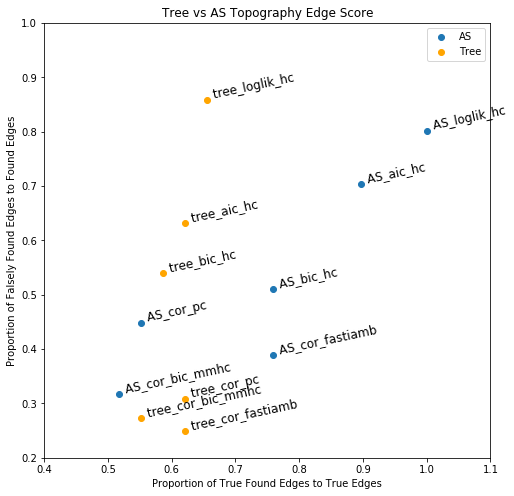

In [277]:
plt.rcParams['figure.figsize']=[8,8]
fig, ax = plt.subplots()
y = scores.iloc[:, 2]
z = scores.iloc[:,1]
y1 = scores.iloc[:6, 2]
z1 = scores.iloc[:6,1]
y2 = scores.iloc[6:, 2]
z2 = scores.iloc[6:,1]
n = scores.iloc[:,0]
ax.scatter(z1, y1)
ax.scatter(z2, y2, color = 'orange')
for i, txt in enumerate(n):
    ax.text(z[i], y[i],"  "+txt, fontsize=12, rotation=12, rotation_mode='anchor')
ax.set_xlabel("Proportion of True Found Edges to True Edges")
ax.set_ylabel("Proportion of Falsely Found Edges to Found Edges")
ax.set_title("Tree vs AS Topography Edge Score")
ax.set_ylim([0.2,1])
ax.set_xlim([0.4,1.1])
plt.legend(['AS', 'Tree'])
plt.savefig("edge_scores.png", format="PNG")


In [275]:
distances = np.sqrt(scores[2]**2 + (1-scores[1])**2)

In [276]:
distances

0     0.712100
1     0.565242
2     0.578183
3     0.457710
4     0.633958
5     0.801370
6     0.737649
7     0.680741
8     0.524720
9     0.454287
10    0.488417
11    0.924894
dtype: float64